In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

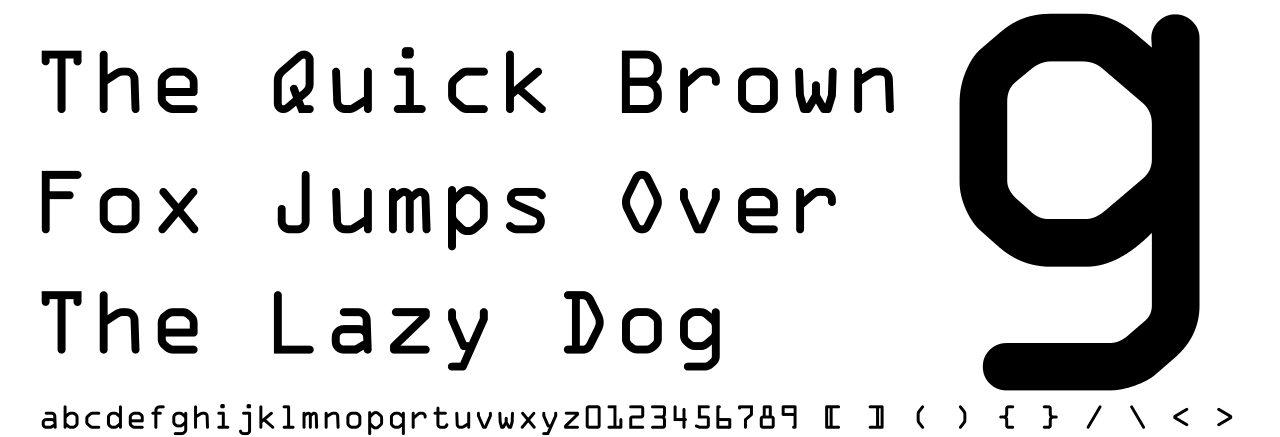

In [ ]:
image = cv2.imread("sample.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(image)

The @®uick Brown
Fox Jumps Over
The Lazy Dog

aocdefghijklmnopyrtuvwxyzOlcs45b789£F 1 t ) tf E/N K&D?

 



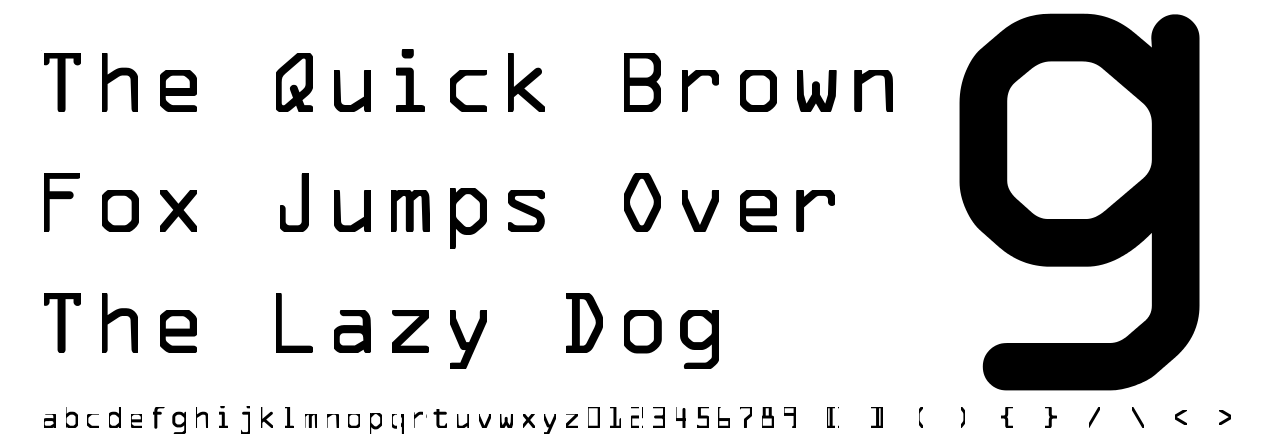

In [ ]:
# img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(pytesseract.image_to_string(image))
# cv2_imshow(img)
cv2_imshow(image)

In [ ]:
results = pytesseract.image_to_boxes(image)
print(results)

T 44 325 81 384 0
h 102 325 138 384 0
e 160 325 197 367 0
@ 276 325 313 384 0
® 289 325 319 388 0
u 334 325 371 367 0
i 396 325 425 388 0
c 450 325 487 367 0
k 508 325 545 384 0
B 624 325 661 384 0
r 682 325 719 367 0
o 740 325 777 367 0
w 736 325 840 384 0
n 797 325 893 367 0
F 44 205 80 264 0
o 102 205 139 247 0
x 160 205 197 247 0
J 280 205 309 264 0
u 334 205 371 247 0
m 391 205 430 247 0
p 450 188 487 249 0
s 508 205 545 247 0
O 624 205 661 264 0
v 624 205 719 264 0
e 682 205 719 247 0
r 740 205 835 247 0
T 44 84 81 144 0
h 102 84 138 144 0
e 160 84 197 127 0
L 276 84 313 144 0
a 334 84 371 127 0
z 392 84 429 127 0
y 450 68 487 127 0
D 566 84 603 144 0
o 566 68 663 144 0
g 624 68 719 127 0
a 44 9 56 23 0
o 66 9 78 30 0
c 87 9 99 23 0
d 109 9 121 30 0
e 131 9 142 23 0
f 153 8 165 30 0
g 172 3 186 25 0
h 196 9 208 30 0
i 219 9 228 31 0
j 241 3 250 31 0
k 261 9 273 30 0
l 285 9 294 30 0
m 305 9 317 23 0
n 327 9 339 23 0
o 348 9 360 23 0
p 370 3 382 24 0
y 392 3 404 23 0
r 414 9 423 2

['T', '44', '325', '81', '384', '0']
['h', '102', '325', '138', '384', '0']
['e', '160', '325', '197', '367', '0']
['@', '276', '325', '313', '384', '0']
['®', '289', '325', '319', '388', '0']
['u', '334', '325', '371', '367', '0']
['i', '396', '325', '425', '388', '0']
['c', '450', '325', '487', '367', '0']
['k', '508', '325', '545', '384', '0']
['B', '624', '325', '661', '384', '0']
['r', '682', '325', '719', '367', '0']
['o', '740', '325', '777', '367', '0']
['w', '736', '325', '840', '384', '0']
['n', '797', '325', '893', '367', '0']
['F', '44', '205', '80', '264', '0']
['o', '102', '205', '139', '247', '0']
['x', '160', '205', '197', '247', '0']
['J', '280', '205', '309', '264', '0']
['u', '334', '205', '371', '247', '0']
['m', '391', '205', '430', '247', '0']
['p', '450', '188', '487', '249', '0']
['s', '508', '205', '545', '247', '0']
['O', '624', '205', '661', '264', '0']
['v', '624', '205', '719', '264', '0']
['e', '682', '205', '719', '247', '0']
['r', '740', '205', '835', '2

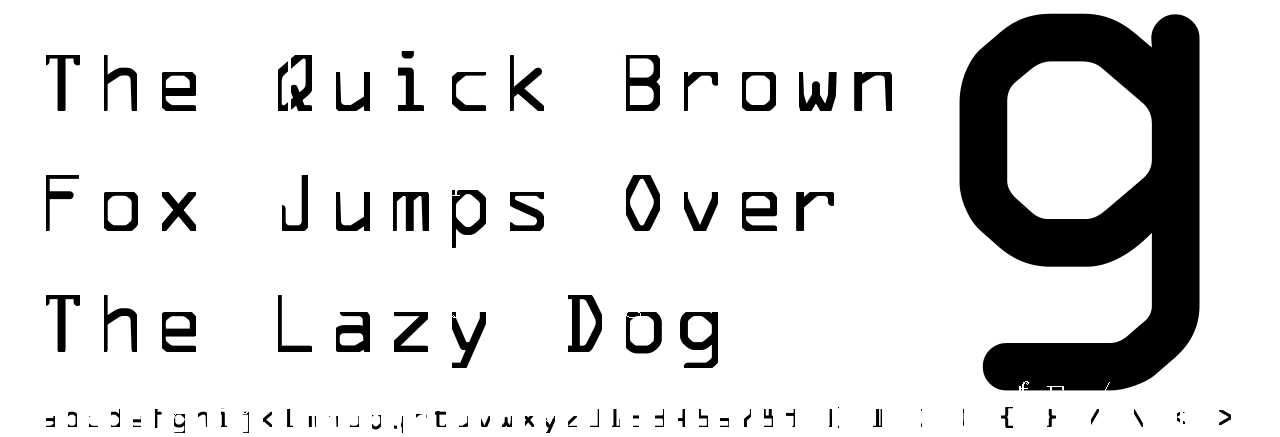

In [ ]:
ih, iw, ic = image.shape
for box in results.splitlines():
  box = box.split(' ')
  print(box)

  x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
  cv2.rectangle(image, (x, ih-y), (w, ih-h), (0, 255, 0), 2)
  cv2.putText(image, box[0], (x, ih-h), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1)

cv2_imshow(image)

In [ ]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('sample.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)